In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [43]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

heart = pd.read_csv(url, header=None, names=columns)

heart = heart.replace("?", pd.NA).dropna()
heart = heart.astype(float)

X = heart.iloc[:, :-1]  
y = heart.iloc[:, -1].apply(lambda x: 1 if x > 0 else 0)  # 0 for no disease, 1 for disease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6, stratify=y)
X_train.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,54.536232,0.642512,3.101449,132.570048,246.169082,0.144928,1.028986,150.444444,0.318841,1.077295,1.623188,0.676329,4.671498
std,9.025175,0.480422,1.011750,18.544716,52.860279,0.352881,0.994710,23.211471,0.467157,1.135703,0.601812,0.953568,1.940451
min,29.000000,0.000000,1.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,239.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.500000,1.000000,4.000000,142.000000,269.500000,0.000000,2.000000,168.000000,1.000000,1.700000,2.000000,1.000000,7.000000
max,76.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [44]:
clf = DecisionTreeClassifier(random_state=6)  
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=6)

Accuracy: 0.7444444444444445
Cross Validation Scores Mean: 0.7471186440677966
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.70      0.79      0.74        42

    accuracy                           0.74        90
   macro avg       0.75      0.75      0.74        90
weighted avg       0.75      0.74      0.74        90



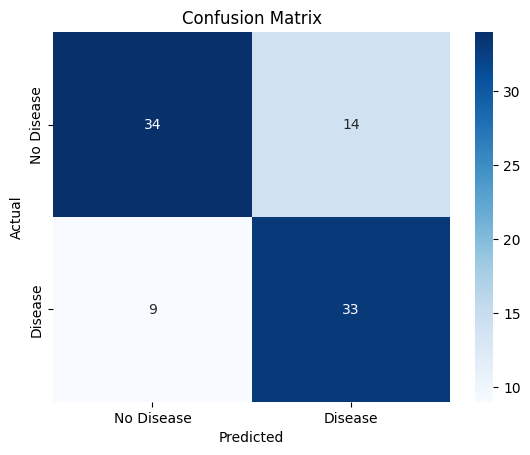

In [45]:
y_pred = clf.predict(X_test)
cross_scores = cross_val_score(clf, X, y, cv=5)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Cross Validation Scores Mean:", cross_scores.mean())
print("Classification Report:\n", classification_report(y_test, y_pred))
class_names = ["No Disease", "Disease"]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


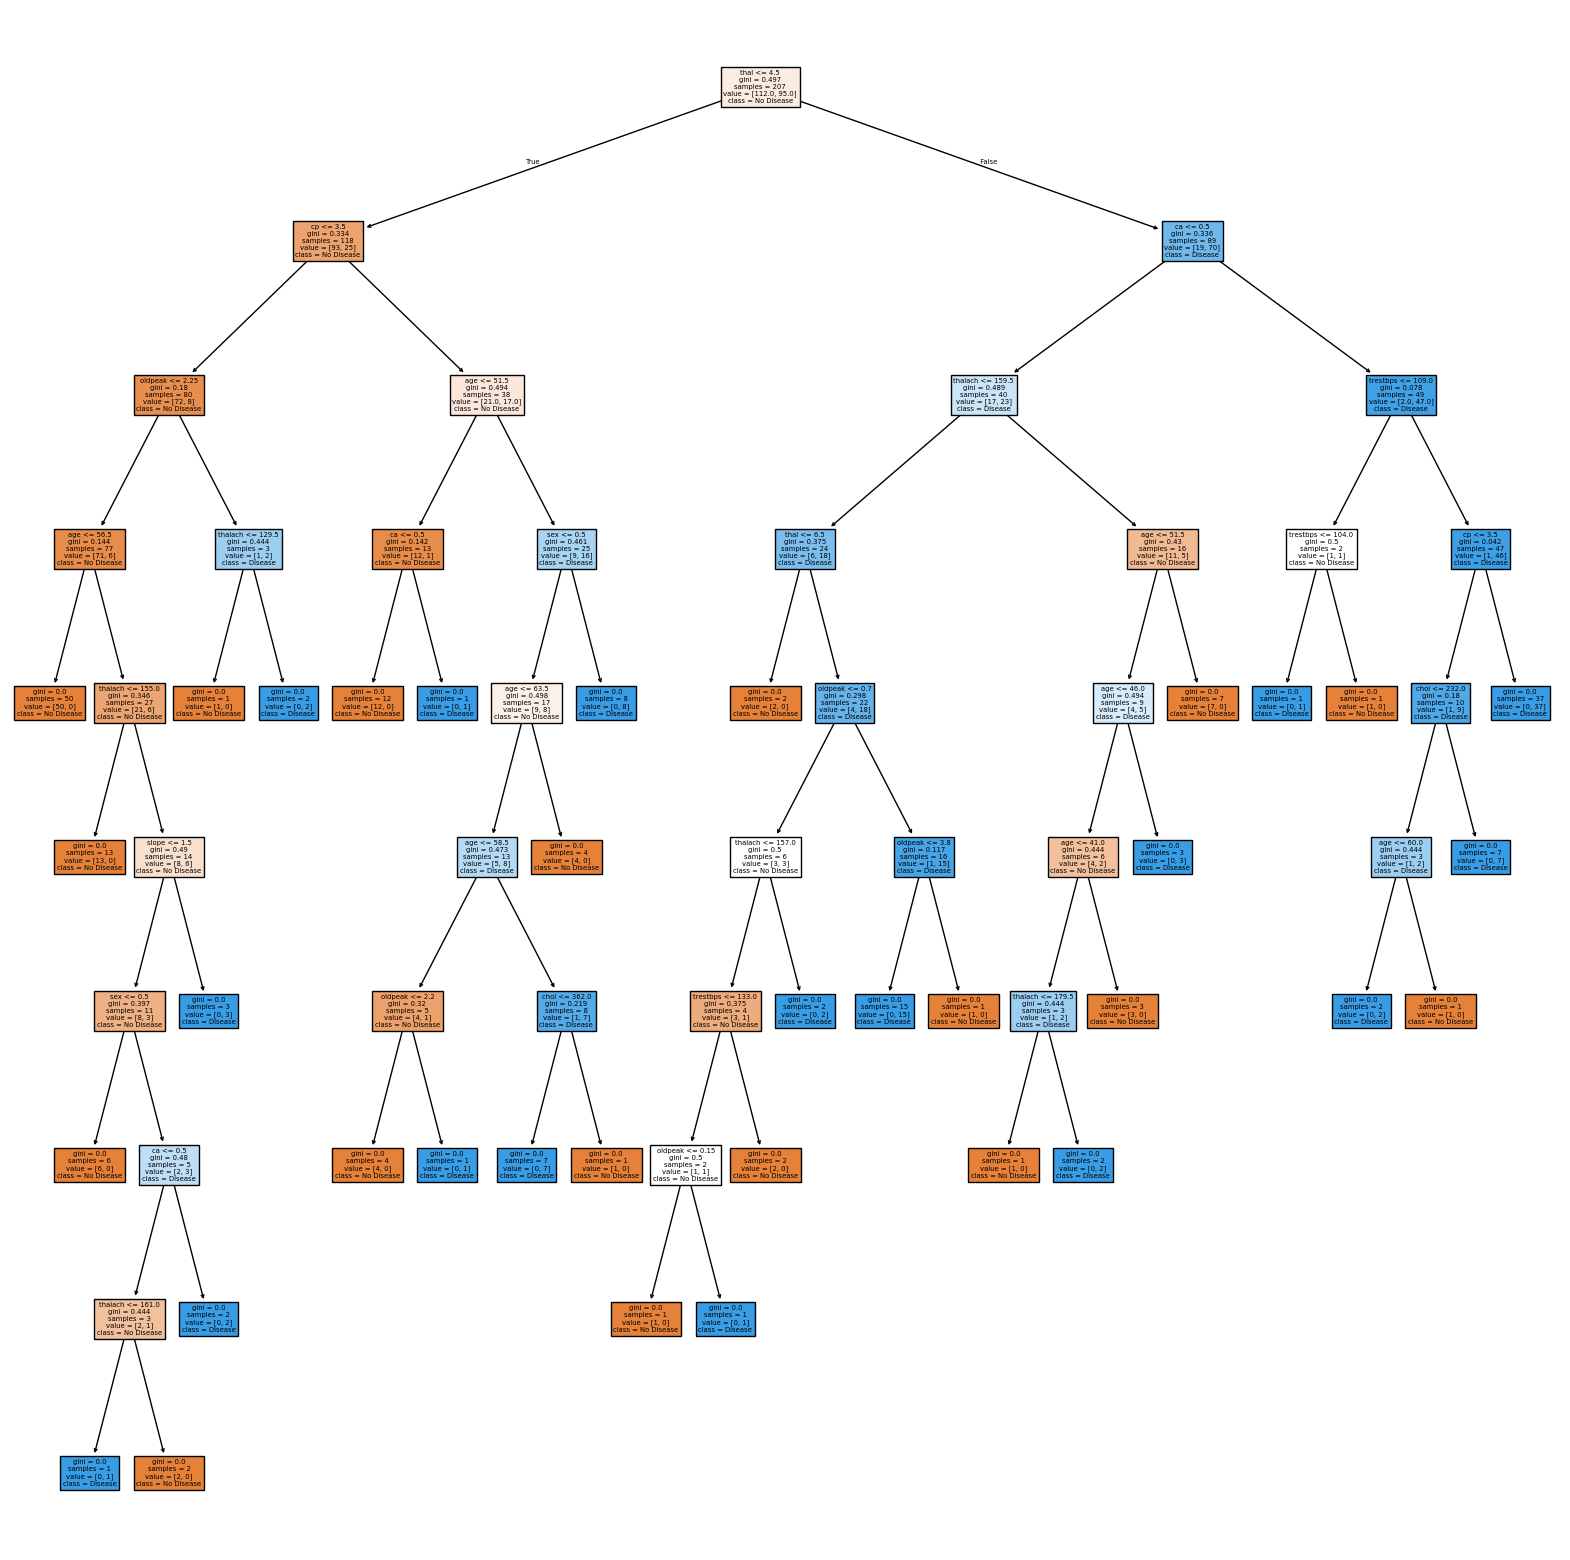

In [46]:
# plot decision tree
plt.figure(figsize=(20, 20))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()
